In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df=pd.read_csv("House Grade.csv")

In [3]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [4]:
df_c=df

In [5]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [6]:
df_c[df_c.duplicated()].head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade


In [7]:
df_c['Grade'].unique()

array(['D', 'C', 'B', 'A', 'E'], dtype=object)

In [8]:
df_c['Area(total)'].unique()

array([339, 358, 324, 330, 320, 314, 332, 323, 351, 308, 309, 303, 321,
       345, 307, 337, 333, 343, 322, 326, 329, 292, 298, 296, 354, 318,
       301, 352, 348, 304, 336, 355, 299, 349, 310, 344, 338, 312, 328,
       342, 335, 359, 313, 334, 300, 302, 317, 306, 341, 293, 294, 327,
       311, 347, 290, 360, 316, 295, 315, 331, 305, 356, 346, 357, 350,
       297, 325, 291, 340, 353, 319], dtype=int64)

In [9]:
df_c=df_c.drop(['Id'],axis=1)

In [10]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area(total)     3000 non-null   int64 
 1   Trooms          3000 non-null   int64 
 2   Nbedrooms       3000 non-null   int64 
 3   Nbwashrooms     3000 non-null   int64 
 4   Twashrooms      3000 non-null   int64 
 5   roof            3000 non-null   object
 6   Roof(Area)      3000 non-null   int64 
 7   Lawn(Area)      3000 non-null   int64 
 8   Nfloors         3000 non-null   int64 
 9   API             3000 non-null   int64 
 10  ANB             3000 non-null   int64 
 11  Expected price  3000 non-null   int64 
 12  Grade           3000 non-null   object
dtypes: int64(11), object(2)
memory usage: 304.8+ KB


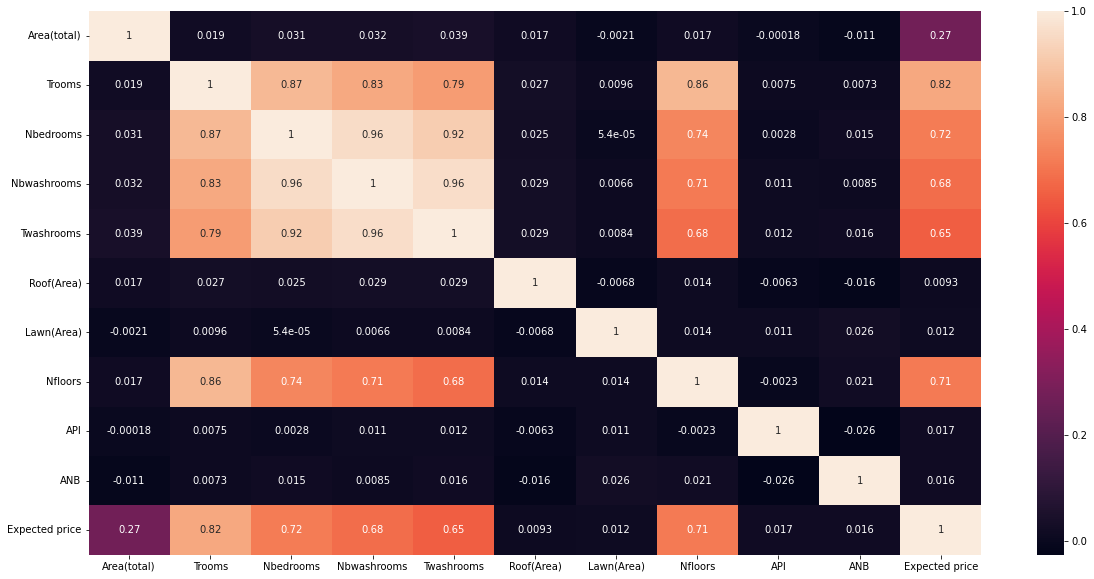

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df_c.corr(), annot=True);

## EDA

array([[<AxesSubplot:title={'center':'Area(total)'}>,
        <AxesSubplot:title={'center':'Trooms'}>,
        <AxesSubplot:title={'center':'Nbedrooms'}>],
       [<AxesSubplot:title={'center':'Nbwashrooms'}>,
        <AxesSubplot:title={'center':'Twashrooms'}>,
        <AxesSubplot:title={'center':'Roof(Area)'}>],
       [<AxesSubplot:title={'center':'Lawn(Area)'}>,
        <AxesSubplot:title={'center':'Nfloors'}>,
        <AxesSubplot:title={'center':'API'}>],
       [<AxesSubplot:title={'center':'ANB'}>,
        <AxesSubplot:title={'center':'Expected price'}>, <AxesSubplot:>]],
      dtype=object)

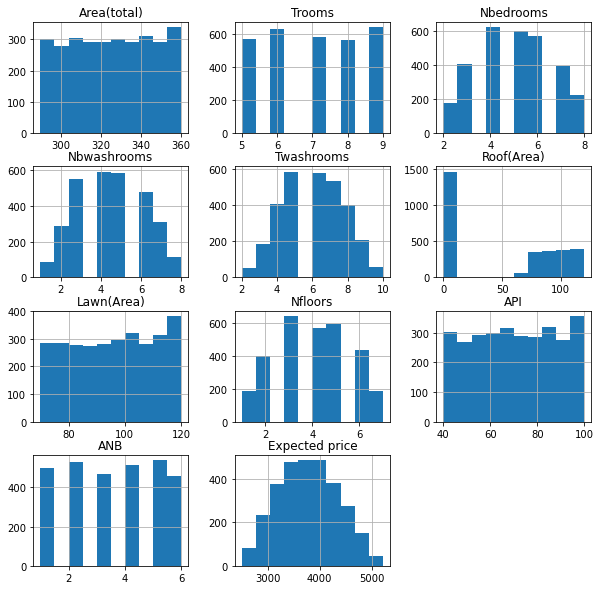

In [12]:
df_c.hist(figsize=(10,10),bins=10)

<AxesSubplot:xlabel='roof', ylabel='count'>

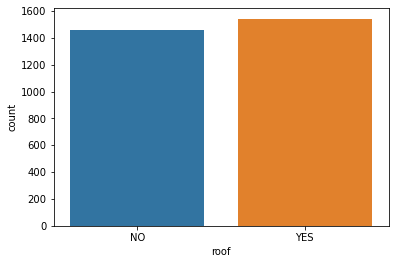

In [13]:
sns.countplot(x=df_c['roof'])

<AxesSubplot:xlabel='Trooms', ylabel='count'>

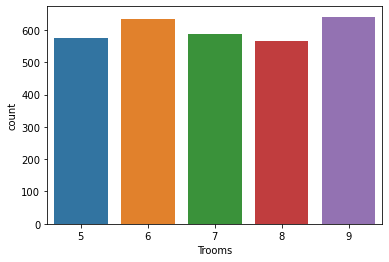

In [14]:
sns.countplot(x=df_c['Trooms'])

<AxesSubplot:xlabel='Nbwashrooms', ylabel='count'>

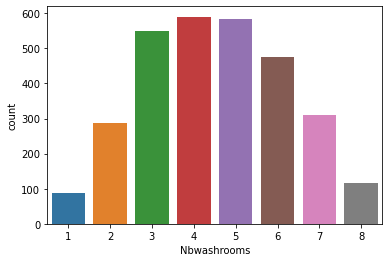

In [15]:
sns.countplot(x=df_c['Nbwashrooms'])

<AxesSubplot:xlabel='Nfloors', ylabel='count'>

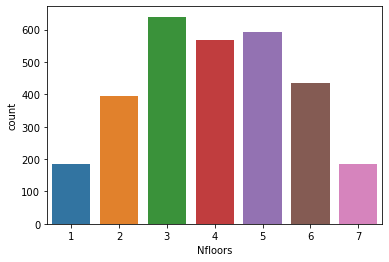

In [16]:
sns.countplot(x=df_c['Nfloors'])

<AxesSubplot:xlabel='Nbedrooms', ylabel='count'>

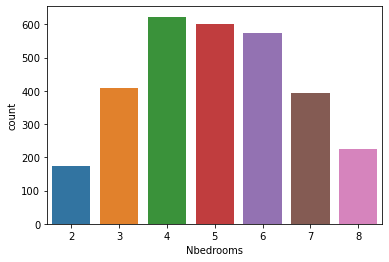

In [17]:
sns.countplot(x=df_c['Nbedrooms'])

<AxesSubplot:xlabel='roof', ylabel='count'>

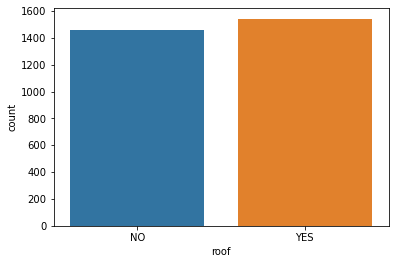

In [18]:
sns.countplot(x=df_c['roof'])

<AxesSubplot:xlabel='Grade', ylabel='count'>

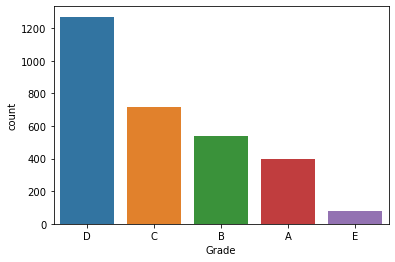

In [19]:
sns.countplot(x=df_c['Grade'])

In [20]:
df_c.columns

Index(['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

<AxesSubplot:xlabel='Grade', ylabel='API'>

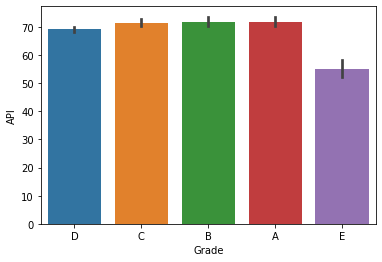

In [21]:
sns.barplot(x = 'Grade', y ='API', data = df_c)

<AxesSubplot:xlabel='Grade', ylabel='Area(total)'>

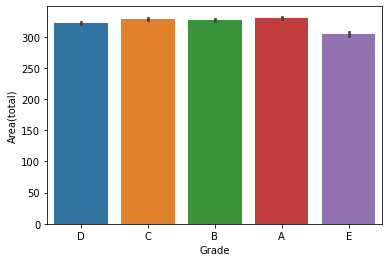

In [22]:
sns.barplot(x = 'Grade', y ='Area(total)', data = df_c)

<AxesSubplot:xlabel='Grade', ylabel='Trooms'>

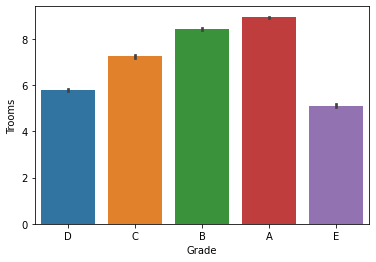

In [23]:
sns.barplot(x = 'Grade', y ='Trooms', data = df_c)

(array([ 57., 169., 267., 345., 406., 414., 418., 332., 292., 159., 108.,
         33.]),
 array([2504., 2730., 2956., 3182., 3408., 3634., 3860., 4086., 4312.,
        4538., 4764., 4990., 5216.]),
 <BarContainer object of 12 artists>)

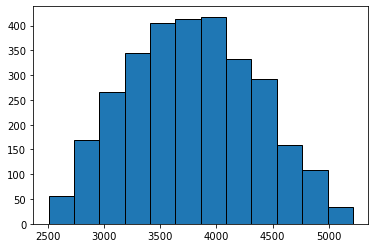

In [24]:
plt.hist(df_c['Expected price'],bins=12,edgecolor='black')

{'whiskers': [<matplotlib.lines.Line2D at 0x14ae8878b50>,
 'caps': [<matplotlib.lines.Line2D at 0x14ae88871f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ae8878880>],
 'medians': [<matplotlib.lines.Line2D at 0x14ae88876d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ae88879a0>],
 'means': []}

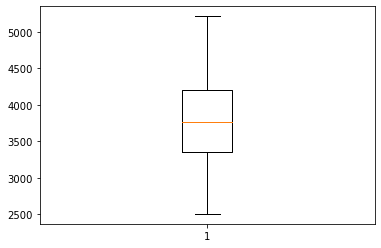

In [25]:
plt.boxplot(df_c['Expected price'])

<AxesSubplot:xlabel='Grade', ylabel='Expected price'>

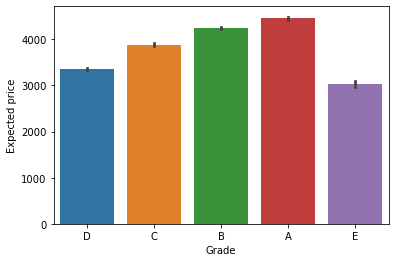

In [26]:
sns.barplot(x=df_c['Grade'],y=df_c['Expected price'])

In [27]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area(total)     3000 non-null   int64 
 1   Trooms          3000 non-null   int64 
 2   Nbedrooms       3000 non-null   int64 
 3   Nbwashrooms     3000 non-null   int64 
 4   Twashrooms      3000 non-null   int64 
 5   roof            3000 non-null   object
 6   Roof(Area)      3000 non-null   int64 
 7   Lawn(Area)      3000 non-null   int64 
 8   Nfloors         3000 non-null   int64 
 9   API             3000 non-null   int64 
 10  ANB             3000 non-null   int64 
 11  Expected price  3000 non-null   int64 
 12  Grade           3000 non-null   object
dtypes: int64(11), object(2)
memory usage: 304.8+ KB


## Label Encoder

In [28]:
label_encoder=LabelEncoder()
df_c['roof']=label_encoder.fit_transform(df_c['roof'])
df_c['Grade']=label_encoder.fit_transform(df_c['Grade'])

## Scaling

In [29]:
scaler=StandardScaler()
scaled=pd.DataFrame(scaler.fit_transform(df_c),columns=df_c.columns)

## Spliting

In [30]:
x=scaled.drop(['Grade'],axis=1)

In [31]:
y=df_c['Grade']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

## Logistic Regression

In [33]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
print('train acuracy:-',lg.score(x_train,y_train))
y_pred=lg.predict(x_test)
print('test acuracy:-',accuracy_score(y_test,y_pred))


train acuracy:- 0.9629166666666666
test acuracy:- 0.9566666666666667


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        87
           1       0.91      0.95      0.93       106
           2       0.94      0.93      0.94       125
           3       0.97      0.99      0.98       272
           4       1.00      0.60      0.75        10

    accuracy                           0.96       600
   macro avg       0.96      0.88      0.91       600
weighted avg       0.96      0.96      0.96       600



<AxesSubplot:xlabel='Grade'>

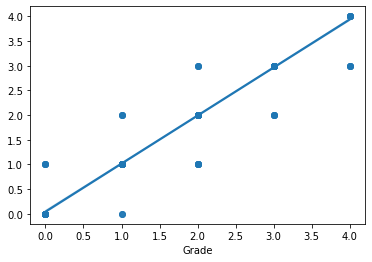

In [35]:
sns.regplot(y_test,y_pred)

## Decision Tree Classifier

In [36]:
dfc=DecisionTreeClassifier(max_depth=3)
dfc.fit(x_train,y_train)
print('train score:',dfc.score(x_train,y_train))
dfc_y_pred=dfc.predict(x_test)
print('test score:',accuracy_score(y_test,dfc_y_pred))

train score: 0.755
test score: 0.7816666666666666


In [37]:
print(classification_report(y_test,dfc_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75        87
           1       0.62      0.91      0.73       106
           2       0.74      0.50      0.59       125
           3       0.84      0.95      0.89       272
           4       0.00      0.00      0.00        10

    accuracy                           0.78       600
   macro avg       0.64      0.59      0.59       600
weighted avg       0.79      0.78      0.77       600



<AxesSubplot:xlabel='Grade'>

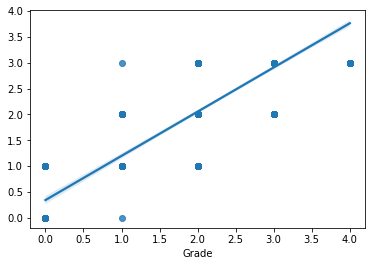

In [38]:
sns.regplot(y_test,dfc_y_pred)

## Ada Boost Classifier

In [39]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
print('train score:',adc.score(x_train,y_train))
adc_y_pred=adc.predict(x_test)
print('test score:',accuracy_score(y_test,adc_y_pred))

train score: 0.5875
test score: 0.59


In [40]:
print(classification_report(y_test,adc_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.46      0.92      0.61       106
           2       0.79      0.42      0.54       125
           3       0.80      0.72      0.76       272
           4       0.10      0.80      0.18        10

    accuracy                           0.59       600
   macro avg       0.43      0.57      0.42       600
weighted avg       0.61      0.59      0.57       600



<AxesSubplot:xlabel='Grade'>

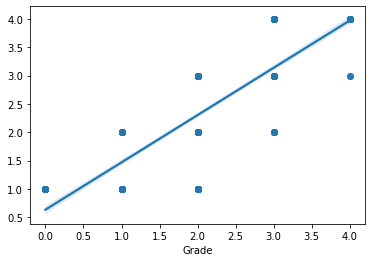

In [41]:
sns.regplot(y_test,adc_y_pred)

## MLP Classifier

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
mlpc=MLPClassifier()
mlpc.fit(x_train,y_train)
print('train score:',mlpc.score(x_train,y_train))
mlpc_y_pred=mlpc.predict(x_test)
print('test score:',accuracy_score(y_test,mlpc_y_pred))

train score: 0.9916666666666667
test score: 0.9633333333333334


In [44]:
print(classification_report(y_test,mlpc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        87
           1       0.94      0.97      0.95       106
           2       0.95      0.98      0.96       125
           3       0.97      0.98      0.98       272
           4       0.86      0.60      0.71        10

    accuracy                           0.96       600
   macro avg       0.94      0.89      0.91       600
weighted avg       0.96      0.96      0.96       600



<AxesSubplot:xlabel='Grade'>

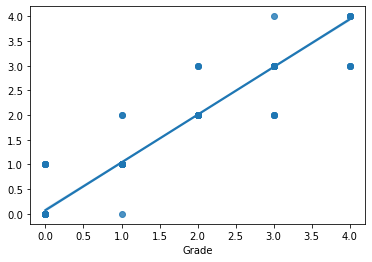

In [45]:
sns.regplot(y_test,mlpc_y_pred)

## Prediction by giving feature input

In [46]:
df_c.columns

Index(['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [47]:
x1=df_c.drop(['Grade','Trooms','Nbwashrooms', 'Twashrooms','Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',],axis=1)

In [48]:
y1=df_c['Grade']

In [49]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,train_size=0.8,random_state=42)

In [50]:
def pred():
    new_input=[]
    Area=int(input('Enter area : '))
    new_input.append(Area)

    bedrooms=input('Enter bedrooms : ')
    new_input.append(bedrooms)

    roof=float(input('Enter roof : '))
    new_input.append(roof)
    
    Expected_price=float(input('Enter Expected price : '))
    new_input.append(Expected_price)
    

    
    return new_input

In [51]:
new_input=pred()

Enter area : 500
Enter bedrooms : 2
Enter roof : 1
Enter Expected price : 3000


In [52]:
dic1={
    
    'Area(total)':[],'Nbedrooms':[],'roof':[],'Expected price':[]
}
new_data=pd.DataFrame(dic1)

In [53]:
new_data.loc[len(new_data)]=new_input

In [54]:
lr1=LogisticRegression()

lr1.fit(x_train1,y_train1)

y_pred1=lr1.predict(new_data)

y_pred1

array([3])